In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from re import L
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [6]:
# Load the dataset
df = pd.read_csv('E:\Drive\Drilling\PZ-132.csv')
df.head()

,ROP,WOB,rpm_bit,mudweight_in,mudweight_out,P ovb For Soft formation,P ovb For Hard formation,P ovb,d,D-Adjust,PP Zamora Method,PP Eaton Method
0,0.04,3.6,66,79.47,79.47,0.903,0.938,0.921,0.81,0.81,8.67,7.73
1,0.03,6.1,66,67.81,67.81,0.902,0.937,0.919,0.85,0.85,8.67,7.73
2,0.01,5.9,66,65.68,67.38,0.900,0.936,0.918,0.93,0.91,8.45,7.98
3,0.01,6.6,66,64.07,67.38,0.899,0.935,0.917,0.94,0.89,8.24,8.22
4,0.02,7.5,66,61.55,67.38,0.898,0.934,0.916,0.91,0.83,7.92,8.62


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ROP                       2705 non-null   float64
 1   WOB                       2705 non-null   float64
 2   rpm_bit                   2705 non-null   int64  
 3   mudweight_in              2705 non-null   float64
 4   mudweight_out             2705 non-null   float64
 5   P ovb For Soft formation  2705 non-null   float64
 6   P ovb For Hard formation  2705 non-null   float64
 7   P ovb                     2705 non-null   float64
 8   d                         2705 non-null   float64
 9   D-Adjust                  2705 non-null   float64
 10  PP Zamora Method          2705 non-null   float64
 11  PP Eaton Method           2705 non-null   object 
dtypes: float64(10), int64(1), object(1)
memory usage: 253.7+ KB


In [8]:
# Drop unnecessary features
df = df.drop(
    ['P ovb For Soft formation', 'P ovb For Hard formation', 'P ovb', 'd', 'D-Adjust',
     'PP Eaton Method'], axis=1
)
df = df.drop(0, axis=0)
df = df.reset_index(drop=True)
df.head()

,ROP,WOB,rpm_bit,mudweight_in,mudweight_out,PP Zamora Method
0,0.03,6.1,66,67.81,67.81,8.67
1,0.01,5.9,66,65.68,67.38,8.45
2,0.01,6.6,66,64.07,67.38,8.24
3,0.02,7.5,66,61.55,67.38,7.92
4,0.02,7.5,66,58.77,67.38,7.56


In [15]:
df = df.dropna()

In [16]:
print(df.isnull().sum())

ROP                 0
WOB                 0
rpm_bit             0
mudweight_in        0
mudweight_out       0
PP Zamora Method    0
dtype: int64


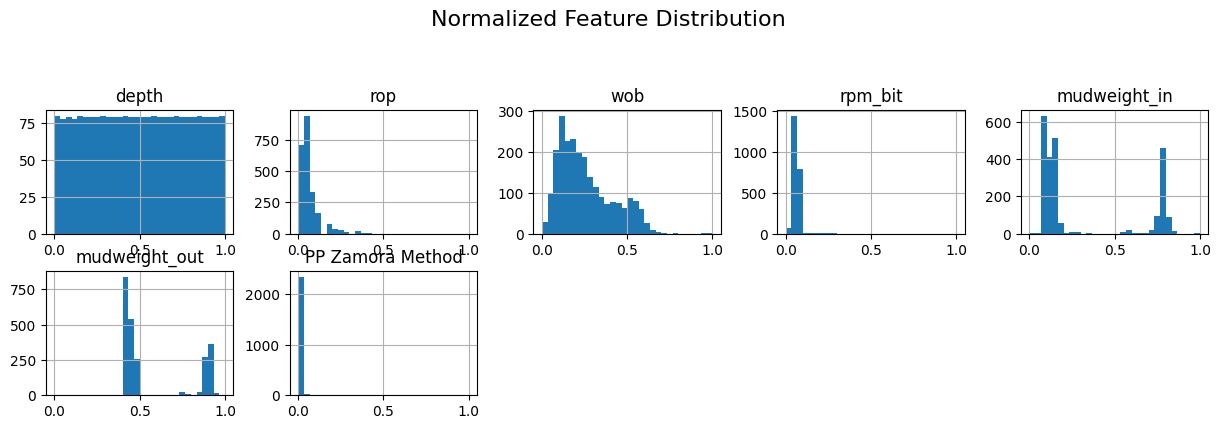

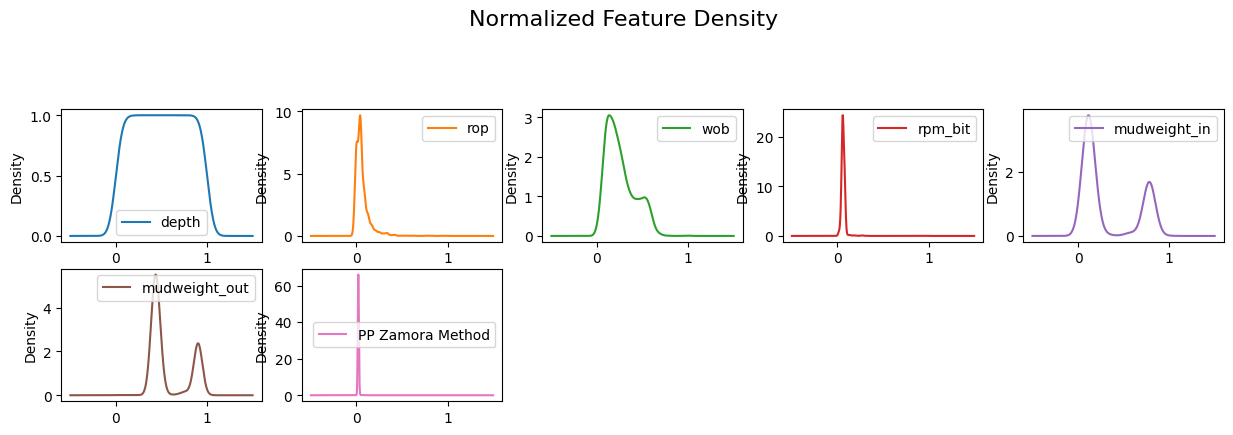

In [50]:
# Plot histograms for normalized data

df_normalized = (df - df.min()) / (df.max() - df.min())  # Min-max normalization

df_normalized.hist(figsize=(15, 10), bins=30, layout=(5, 5))
plt.suptitle("Normalized Feature Distribution", fontsize=16)
plt.show()

# Alternatively, density plot
df_normalized.plot(kind='density', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False)
plt.suptitle("Normalized Feature Density", fontsize=16)
plt.show()


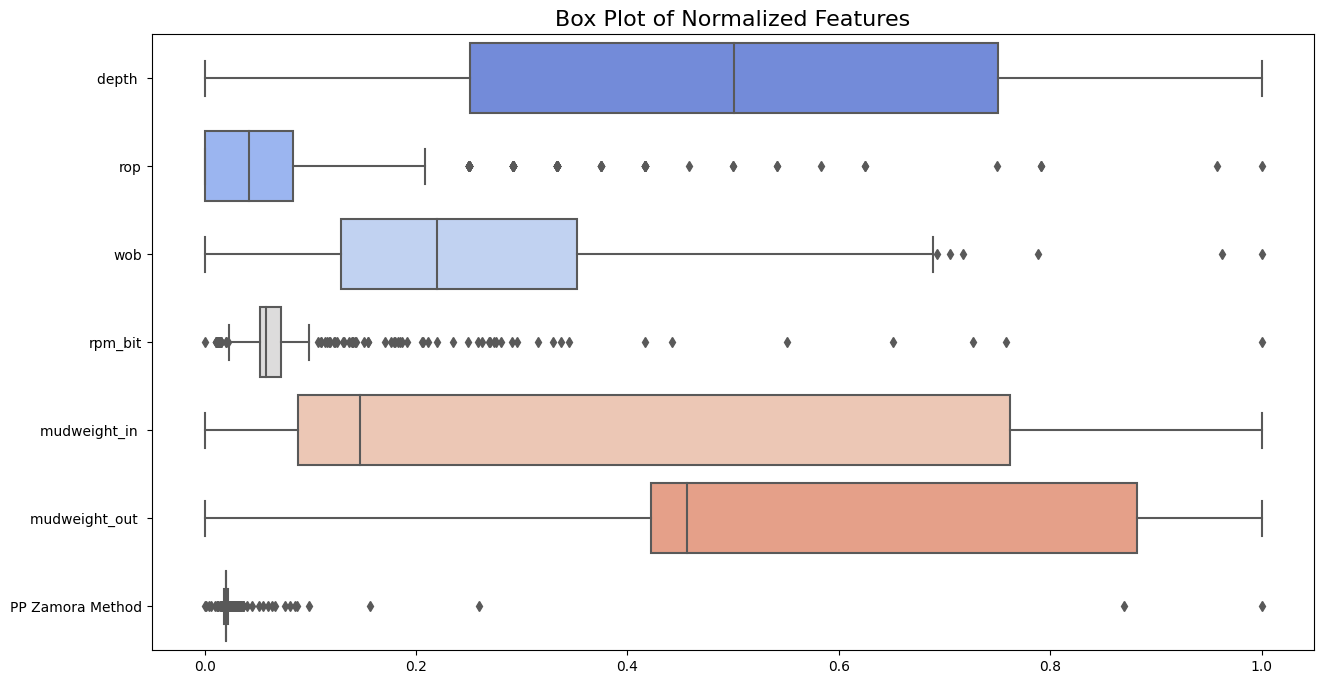

In [36]:
# Box Plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_normalized, orient='h', palette="coolwarm")
plt.title("Box Plot of Normalized Features", fontsize=16)
plt.show()


In [ ]:
# Separate features and target
X = df.drop('PP Zamora Method', axis=1)
y = df['PP Zamora Method']

# Transformation to Reduce Skewness - Apply log(1+x) transformation to reduce skewness
df_transformed = df.copy()
for col in df_transformed.columns:
    df_transformed[col] = np.log1p(df_transformed[col])

X_transformed = df_transformed.drop('PP Zamora Method', axis=1)

# Train/test split on transformed data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Robust Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("\nBaseline Linear Regression (With Transformation and Scaling):")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2 Score:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))

# Ridge Regression (To Handle Outliers and Reduce Overfitting)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

print("\nRidge Regression:")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_ridge))
print("Train R2 Score:", r2_score(y_train, y_train_pred_ridge))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_ridge))
print("Test R2 Score:", r2_score(y_test, y_test_pred_ridge))

# Random Forest Regressor (Handling Nonlinear Relationships and Outliers)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Regressor:")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Train R2 Score:", r2_score(y_train, y_train_pred_rf))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_rf))
print("Test R2 Score:", r2_score(y_test, y_test_pred_rf))

# Check for Overfitting and Underfitting - Calculate performance gaps between train and test sets
lr_train_test_gap = r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred)
ridge_train_test_gap = r2_score(y_train, y_train_pred_ridge) - r2_score(y_test, y_test_pred_ridge)
rf_train_test_gap = r2_score(y_train, y_train_pred_rf) - r2_score(y_test, y_test_pred_rf)

print("\nOverfitting/Underfitting Analysis:")
print(f"Linear Regression Train-Test R2 Gap: {lr_train_test_gap:.4f}")
print(f"Ridge Regression Train-Test R2 Gap: {ridge_train_test_gap:.4f}")
print(f"Random Forest Train-Test R2 Gap: {rf_train_test_gap:.4f}")


c:\Users\H.Naeeme\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ROP              0
WOB              0
rpm_bit          0
mudweight_in     3
mudweight_out    0
dtype: int64


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [18]:
print(np.isnan(X_train_scaled).sum())  # Check for NaNs in the scaled training data
print(np.isnan(X_test_scaled).sum())  # Check for NaNs in the scaled test data


3
0


In [56]:
# Example: New data input 
new_data = {
    'depth': [62],
    'rop': [0.1],
    'wob': [3.2],
    'rpm_bit': [71],
    'mudweight_in': [66.0],
    'mudweight_out': [66.0],
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Apply Log Transformation
new_data_transformed = new_data_df.copy()
for col in new_data_transformed.columns:
    new_data_transformed[col] = np.log1p(new_data_transformed[col])

# Apply Robust Scaling 
new_data_scaled = scaler.transform(new_data_transformed)

# Make Predictions with Each Model
# Linear Regression Prediction
linear_pred = lr.predict(new_data_scaled)

# Ridge Regression Prediction
ridge_pred = ridge.predict(new_data_scaled)

# Random Forest Prediction
rf_pred = rf.predict(new_data_scaled)

# Display the predictions
print("\nPredictions for New Data:")
print(f"Linear Regression Prediction: {linear_pred[0]}")
print(f"Ridge Regression Prediction: {ridge_pred[0]}")
print(f"Random Forest Prediction: {rf_pred[0]}")



Predictions for New Data:
Linear Regression Prediction: 6.697786871591431
Ridge Regression Prediction: 6.917361624416902
Random Forest Prediction: 8.669999999999986


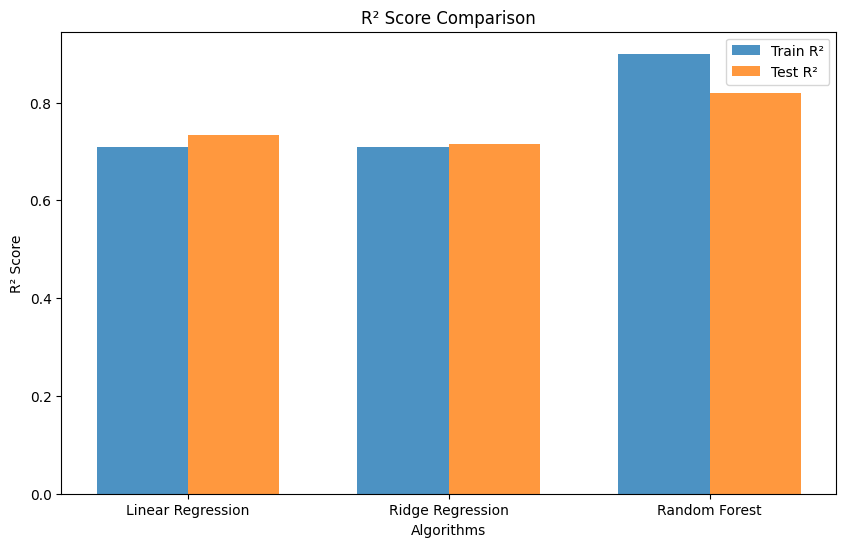

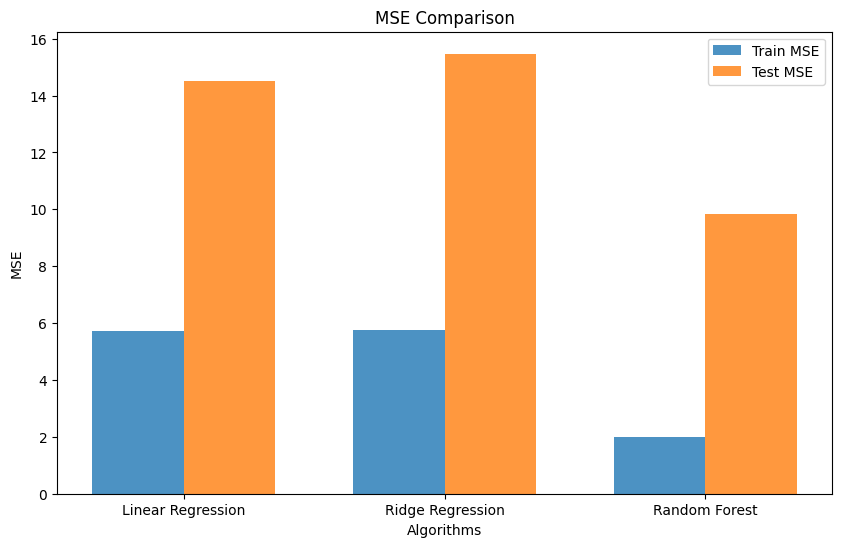

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics from the code
algorithms = ["Linear Regression", "Ridge Regression", "Random Forest"]

# R² scores
r2_train = [0.7096514129038791, 0.7081840220016891, 0.8998324217351683]
r2_test = [0.7329119283522041, 0.715099355128202, 0.818970961223344]

# MSE values
mse_train = [5.735897216397178, 5.764885831342467, 1.9788315110770205]
mse_test = [14.505094389299135, 15.472464644123411, 9.831376139186553]

# R² Score Comparison Bar Chart
x = np.arange(len(algorithms))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, r2_train, width, label='Train R²', alpha=0.8)
bars2 = ax.bar(x + width/2, r2_test, width, label='Test R²', alpha=0.8)

ax.set_xlabel('Algorithms')
ax.set_ylabel('R² Score')
ax.set_title('R² Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()
plt.show()

# MSE Comparison Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mse_train, width, label='Train MSE', alpha=0.8)
bars2 = ax.bar(x + width/2, mse_test, width, label='Test MSE', alpha=0.8)

ax.set_xlabel('Algorithms')
ax.set_ylabel('MSE')
ax.set_title('MSE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()
plt.show()
